# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM and Decision Trees. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to June 17th, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [ ]:
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,28,161.0,154.0,10.0,2505.609457
1,Steinfurt,0,NaN,74.0,4.0,52,41.0,41.0,1.0,2714.197904
2,Magdeburg,0,NaN,83.0,28.0,29,188.0,187.0,6.0,2245.828787
3,Leipzig,0,NaN,61.0,28.0,13,597.0,594.0,21.0,2163.784785
4,Tamm,0,NaN,74.0,4.0,40,336.0,334.0,10.0,2338.611264


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [ ]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [ ]:
market_dt = market_dt.dropna() 

In [ ]:
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to the fact that we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

In [ ]:
customer_dt = market_dt[market_dt['Customer_Flag'] == 1]
customer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1111 non-null   object 
 1   Customer_Flag       1111 non-null   int64  
 2   Revenue             1111 non-null   float64
 3   Sector              1111 non-null   float64
 4   Legal_Form_Code     1111 non-null   float64
 5   CNT_EMPLOYEE        1111 non-null   int64  
 6   CNT_CB_DENSITY      1111 non-null   float64
 7   CNT_CB_MOB_DENSITY  1111 non-null   float64
 8   CNT_CB_FN_DENSITY   1111 non-null   float64
 9   Mobile_potential    1111 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 95.5+ KB


In [ ]:
noncustomer_dt = market_dt[market_dt['Customer_Flag'] == 0]
noncustomer_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5876 entries, 0 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                5876 non-null   object 
 1   Customer_Flag       5876 non-null   int64  
 2   Revenue             5876 non-null   float64
 3   Sector              5876 non-null   float64
 4   Legal_Form_Code     5876 non-null   float64
 5   CNT_EMPLOYEE        5876 non-null   int64  
 6   CNT_CB_DENSITY      5876 non-null   float64
 7   CNT_CB_MOB_DENSITY  5876 non-null   float64
 8   CNT_CB_FN_DENSITY   5876 non-null   float64
 9   Mobile_potential    5876 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 505.0+ KB


In [ ]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
11548,Haar,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451
11551,Greding,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333
11554,Frankfurt,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693
11565,Benningen,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989


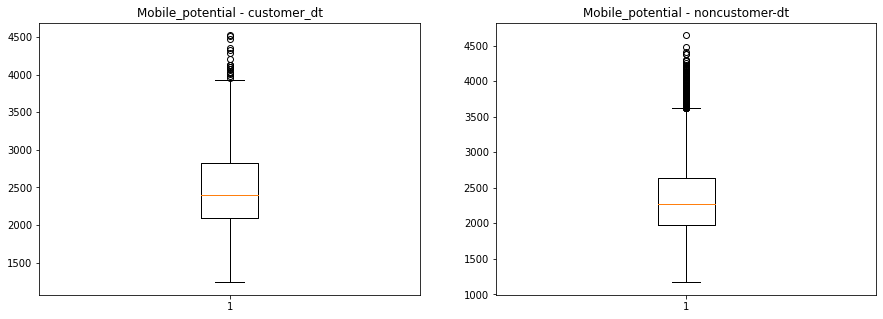

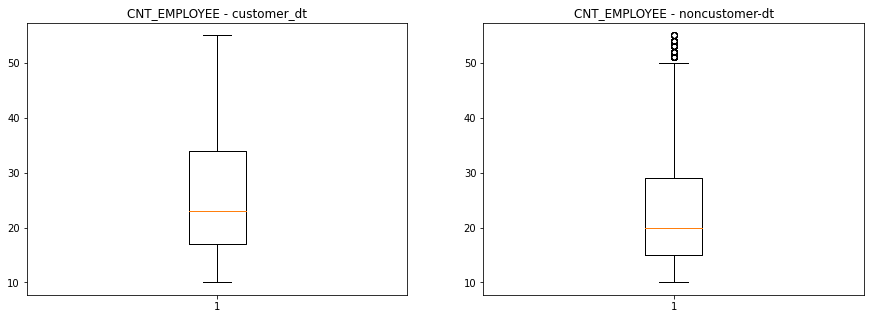

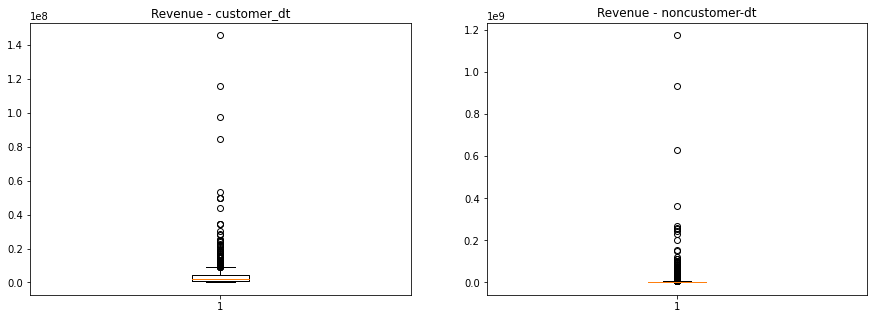

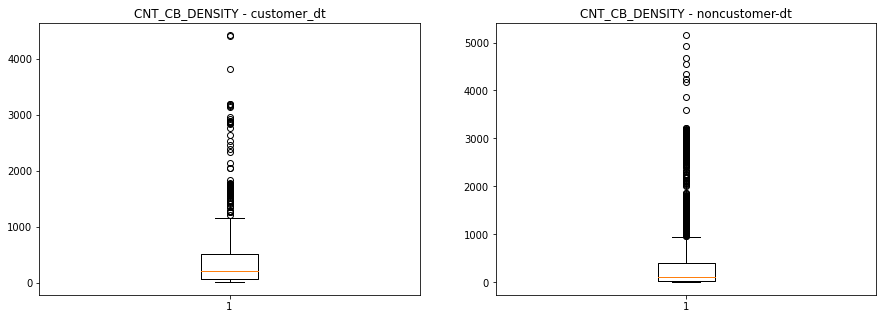

Q1 for 'Revenue' in customer_dt is: 1047500.0
Q2 (median) for 'Revenue' in customer_dt is: 2200000.0
Q3 for 'Revenue' in customer_dt is: 4195000.0


Q1 for 'Mobile_potential' in customer_dt is: 2090.6967281537
Q2 (median) for 'Mobile_potential' in customer_dt is: 2401.464692530968
Q3 for 'Mobile_potential' in customer_dt is: 2826.2351826061667


Q1 for 'Revenue' in noncustomer_dt is: 902986.0
Q2 (median) for 'Revenue' in noncustomer_dt is: 1750000.0
Q3 for 'Revenue' in noncustomer_dt is: 3501123.5


Q1 for 'Mobile_potential' in noncustomer_dt is: 1975.5165190653966
Q2 (median) for 'Mobile_potential' in noncustomer_dt is: 2277.9727974861535
Q3 for 'Mobile_potential' in noncustomer_dt is: 2631.926166103982


In [ ]:
#BOXPLOTS CUSTOMER_DT AND NONCUSTOMER_DT
fig1, ax1 = pyplot.subplots(1,2,figsize = (15,5))
ax1[0].set_title('Mobile_potential - customer_dt')
ax1[0].boxplot(customer_dt['Mobile_potential'])
ax1[1].set_title('Mobile_potential - noncustomer-dt')
ax1[1].boxplot(noncustomer_dt['Mobile_potential'])

fig2, ax2 = pyplot.subplots(1,2,figsize = (15,5))
ax2[0].set_title('CNT_EMPLOYEE - customer_dt')
ax2[0].boxplot(customer_dt['CNT_EMPLOYEE'])
ax2[1].set_title('CNT_EMPLOYEE - noncustomer-dt')
ax2[1].boxplot(noncustomer_dt['CNT_EMPLOYEE'])


fig3, ax3 = pyplot.subplots(1,2,figsize = (15,5))
ax3[0].set_title('Revenue - customer_dt')
ax3[0].boxplot(customer_dt['Revenue'])
ax3[1].set_title('Revenue - noncustomer-dt')
ax3[1].boxplot(noncustomer_dt['Revenue'])

fig4, ax4 = pyplot.subplots(1,2,figsize = (15,5))
ax4[0].set_title('CNT_CB_DENSITY - customer_dt')
ax4[0].boxplot(customer_dt['CNT_CB_DENSITY'])
ax4[1].set_title('CNT_CB_DENSITY - noncustomer-dt')
ax4[1].boxplot(noncustomer_dt['CNT_CB_DENSITY'])

pyplot.show()

print("Q1 for 'Revenue' in customer_dt is:", customer_dt["Revenue"].quantile(0.25))
print("Q2 (median) for 'Revenue' in customer_dt is:", customer_dt["Revenue"].median())
print("Q3 for 'Revenue' in customer_dt is:", customer_dt["Revenue"].quantile(0.75))
print("\n")
print("Q1 for 'Mobile_potential' in customer_dt is:", customer_dt["Mobile_potential"].quantile(0.25))
print("Q2 (median) for 'Mobile_potential' in customer_dt is:", customer_dt["Mobile_potential"].median())
print("Q3 for 'Mobile_potential' in customer_dt is:", customer_dt["Mobile_potential"].quantile(0.75))
print("\n")
print("Q1 for 'Revenue' in noncustomer_dt is:", noncustomer_dt["Revenue"].quantile(0.25))
print("Q2 (median) for 'Revenue' in noncustomer_dt is:", noncustomer_dt["Revenue"].median())
print("Q3 for 'Revenue' in noncustomer_dt is:", noncustomer_dt["Revenue"].quantile(0.75))
print("\n")
print("Q1 for 'Mobile_potential' in noncustomer_dt is:", noncustomer_dt["Mobile_potential"].quantile(0.25))
print("Q2 (median) for 'Mobile_potential' in noncustomer_dt is:", noncustomer_dt["Mobile_potential"].median())
print("Q3 for 'Mobile_potential' in noncustomer_dt is:", noncustomer_dt["Mobile_potential"].quantile(0.75))

In [ ]:
#TO SEE WHICH DATASET HAS HIGHER VALUE FOR CNT_EMPLOYEE
print(customer_dt["CNT_EMPLOYEE"].describe())
print('\n',noncustomer_dt["CNT_EMPLOYEE"].describe())

count    1111.000000
mean       26.064806
std        11.302369
min        10.000000
25%        17.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: CNT_EMPLOYEE, dtype: float64

 count    5876.000000
mean       23.455582
std        10.744597
min        10.000000
25%        15.000000
50%        20.000000
75%        29.000000
max        55.000000
Name: CNT_EMPLOYEE, dtype: float64


In [ ]:
#COUNTING OUTLIERS IN REVENUE:
IQR_1 = iqr(customer_dt["Revenue"])
IQR_2 = iqr(noncustomer_dt["Revenue"])

df1 = customer_dt[customer_dt['Revenue']>1.5*IQR_1]
df2 = noncustomer_dt[noncustomer_dt['Revenue']>1.5*IQR_2]

print("Outliers of revenue in customer_dt: ", len(df1['Revenue']))
print("Outliers of revenue in noncustomer_dt: ",len(df2['Revenue']))


Outliers of revenue in customer_dt:  250
Outliers of revenue in noncustomer_dt:  1351


As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

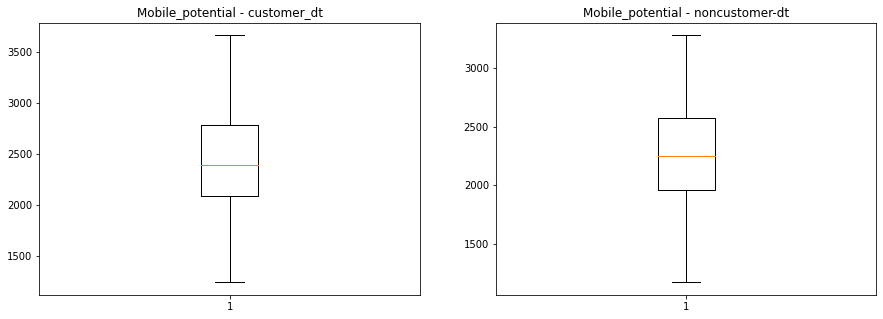

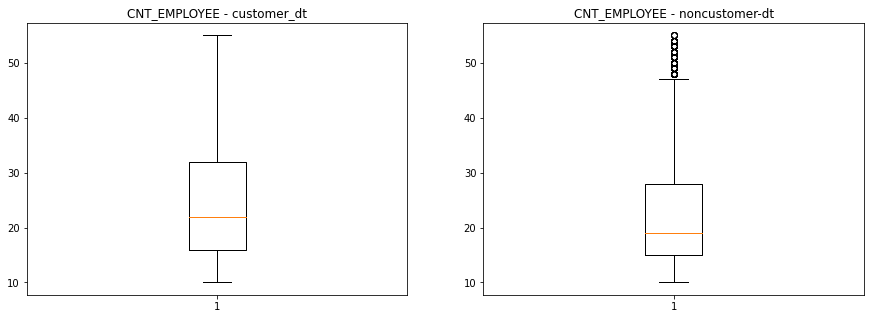

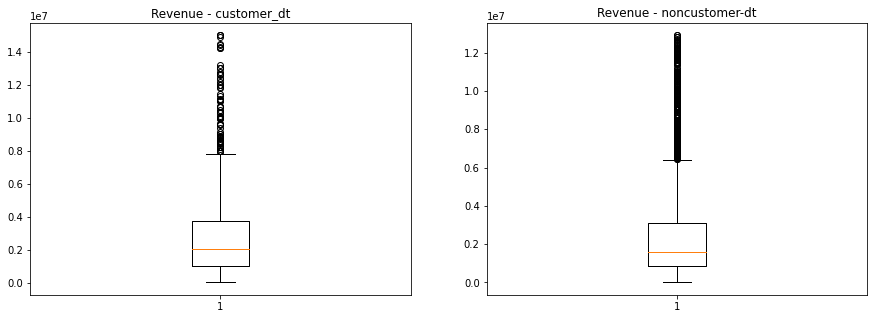

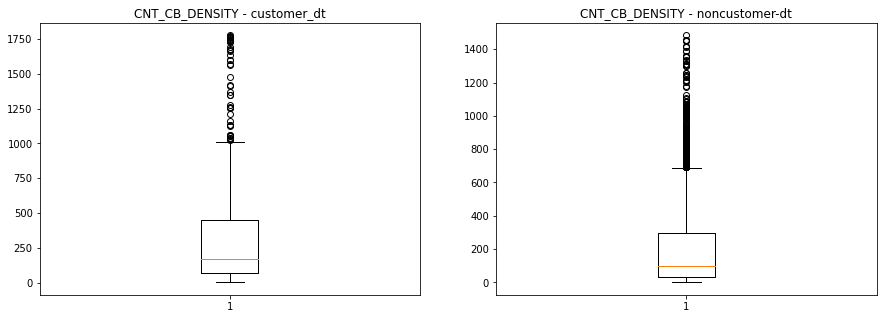

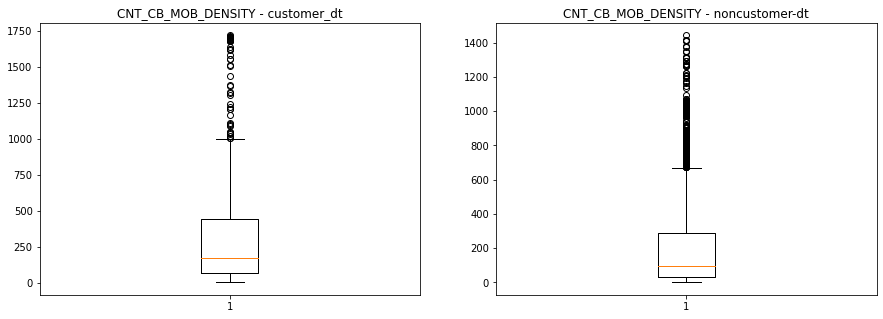

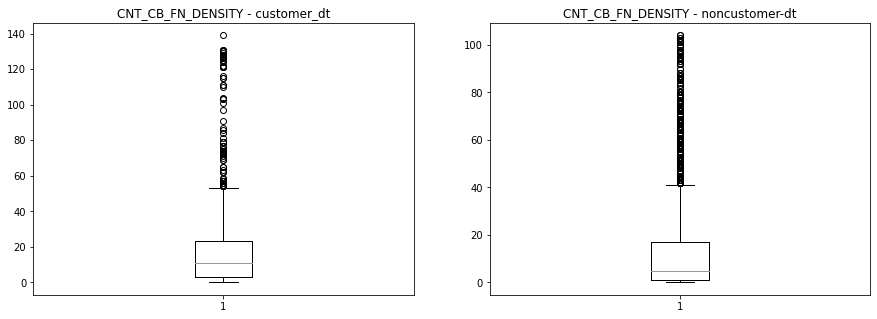

In [ ]:
#REMOVING OUTLIERS AND PLOTTING NEW BOXPPLOTS
customer_dt = customer_dt[(customer_dt ["Revenue"]<=5*iqr(customer_dt["Revenue"])) &
                          (customer_dt ["CNT_EMPLOYEE"]<=5*iqr(customer_dt["CNT_EMPLOYEE"])) &
                          (customer_dt ["Mobile_potential"]<=5*iqr(customer_dt["Mobile_potential"])) &
                          (customer_dt ["CNT_CB_DENSITY"]<=5*iqr(customer_dt["CNT_CB_DENSITY"])) &
                          (customer_dt ["CNT_CB_MOB_DENSITY"]<=5*iqr(customer_dt["CNT_CB_MOB_DENSITY"])) &
                          (customer_dt ["CNT_CB_FN_DENSITY"]<=5*iqr(customer_dt["CNT_CB_FN_DENSITY"]))]

noncustomer_dt = noncustomer_dt[(noncustomer_dt ["Revenue"]<=5*iqr(noncustomer_dt["Revenue"])) &
                          (noncustomer_dt ["CNT_EMPLOYEE"]<=5*iqr(noncustomer_dt["CNT_EMPLOYEE"])) &
                          (noncustomer_dt ["Mobile_potential"]<=5*iqr(noncustomer_dt["Mobile_potential"])) &
                          (noncustomer_dt ["CNT_CB_DENSITY"]<=5*iqr(noncustomer_dt["CNT_CB_DENSITY"])) &
                          (noncustomer_dt ["CNT_CB_MOB_DENSITY"]<=5*iqr(noncustomer_dt["CNT_CB_MOB_DENSITY"])) &
                          (noncustomer_dt ["CNT_CB_FN_DENSITY"]<=5*iqr(noncustomer_dt["CNT_CB_FN_DENSITY"]))]

fig1, ax1 = pyplot.subplots(1,2,figsize = (15,5))
ax1[0].set_title('Mobile_potential - customer_dt')
ax1[0].boxplot(customer_dt['Mobile_potential'])
ax1[1].set_title('Mobile_potential - noncustomer-dt')
ax1[1].boxplot(noncustomer_dt['Mobile_potential'])

fig2, ax2 = pyplot.subplots(1,2,figsize = (15,5))
ax2[0].set_title('CNT_EMPLOYEE - customer_dt')
ax2[0].boxplot(customer_dt['CNT_EMPLOYEE'])
ax2[1].set_title('CNT_EMPLOYEE - noncustomer-dt')
ax2[1].boxplot(noncustomer_dt['CNT_EMPLOYEE'])

fig3, ax3 = pyplot.subplots(1,2,figsize = (15,5))
ax3[0].set_title('Revenue - customer_dt')
ax3[0].boxplot(customer_dt['Revenue'])
ax3[1].set_title('Revenue - noncustomer-dt')
ax3[1].boxplot(noncustomer_dt['Revenue'])

fig4, ax4 = pyplot.subplots(1,2,figsize = (15,5))
ax4[0].set_title('CNT_CB_DENSITY - customer_dt')
ax4[0].boxplot(customer_dt['CNT_CB_DENSITY'])
ax4[1].set_title('CNT_CB_DENSITY - noncustomer-dt')
ax4[1].boxplot(noncustomer_dt['CNT_CB_DENSITY'])

fig5, ax5 = pyplot.subplots(1,2,figsize = (15,5))
ax5[0].set_title('CNT_CB_MOB_DENSITY - customer_dt')
ax5[0].boxplot(customer_dt['CNT_CB_MOB_DENSITY'])
ax5[1].set_title('CNT_CB_MOB_DENSITY - noncustomer-dt')
ax5[1].boxplot(noncustomer_dt['CNT_CB_MOB_DENSITY'])

fig6, ax6 = pyplot.subplots(1,2,figsize = (15,5))
ax6[0].set_title('CNT_CB_FN_DENSITY - customer_dt')
ax6[0].boxplot(customer_dt['CNT_CB_FN_DENSITY'])
ax6[1].set_title('CNT_CB_FN_DENSITY - noncustomer-dt')
ax6[1].boxplot(noncustomer_dt['CNT_CB_FN_DENSITY'])

pyplot.show()


### **ANSWERS AND OBSERVATIONS:**
By comparing with the boxplots of the previous exercise [EX3] we can see that obviously, the number of outliers has diminished. Roughly, what this has generated is a little drop in the mean, median and the standard deviation of these new boxplots.



---



On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [ ]:
ratio_customer = customer_dt["City"].value_counts(normalize=True)
print("Ratio of the values of City for customer_dt dataset \n ",ratio_customer) 

Ratio of the values of City for customer_dt dataset 
  München         0.024059
Köln            0.020921
Chemnitz        0.017782
Dresden         0.015690
Berlin          0.015690
                  ...   
Hiddenhausen    0.001046
Eppelheim       0.001046
Flörsheim       0.001046
Bad Abbach      0.001046
Wedemark        0.001046
Name: City, Length: 557, dtype: float64


In [ ]:
ratio_noncustomer = noncustomer_dt["City"].value_counts(normalize=True)
print("Ratio of the values of City for noncustomer_dt dataset\n ",ratio_noncustomer) 

Ratio of the values of City for noncustomer_dt dataset
  Köln          0.016093
Bremen        0.009982
Stuttgart     0.009778
Dortmund      0.009371
Dresden       0.009167
                ...   
Salzbergen    0.000204
Bonstetten    0.000204
Neusäß        0.000204
Wolfhagen     0.000204
Solms         0.000204
Name: City, Length: 2126, dtype: float64


As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [ ]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [ ]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

In [ ]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,785
11551,Greding,1,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,723
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,443
11554,Frankfurt,1,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,592
11565,Benningen,1,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,205


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [ ]:
final_dataset = customer_dt.merge(noncustomer_dt, on=['City_coded','Revenue','Sector','Legal_Form_Code','CNT_EMPLOYEE','CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Customer_Flag'], how='outer')

In [ ]:
final_dataset.rename(columns = {'Customer_Flag':'Target'}, inplace = True)

cols = ['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential', 'Target']
final_dataset=final_dataset.reindex(columns=cols)

final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,785,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,1
1,723,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,1
2,443,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,1
3,592,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,1
4,205,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,1


In [ ]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5860,734,6391606.0,60.0,20.0,24,57.0,57.0,0.0,2102.700888,0
5861,1867,305000.0,60.0,4.0,13,9.0,9.0,0.0,1548.889725,0
5862,596,4200000.0,23.0,14.0,54,62.0,62.0,6.0,2388.407248,0
5863,1913,1336495.0,60.0,16.0,20,63.0,61.0,2.0,2657.602909,0
5864,982,4593054.0,64.0,14.0,44,90.0,90.0,5.0,2126.540797,0


The output should look like this:

In [ ]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,785,4000000.0,42.0,14.0,17,891.0,867.0,62.0,1846.104451,1
1,723,11780000.0,74.0,4.0,53,7.0,7.0,0.0,2083.941040,1
2,443,2050000.0,43.0,14.0,16,30.0,30.0,1.0,2209.827333,1
3,592,853500.0,63.0,14.0,14,870.0,842.0,77.0,2401.464693,1
4,205,10680000.0,74.0,4.0,17,319.0,317.0,10.0,2579.765989,1


In [ ]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5860,734,6391606.0,60.0,20.0,24,57.0,57.0,0.0,2102.700888,0
5861,1867,305000.0,60.0,4.0,13,9.0,9.0,0.0,1548.889725,0
5862,596,4200000.0,23.0,14.0,54,62.0,62.0,6.0,2388.407248,0
5863,1913,1336495.0,60.0,16.0,20,63.0,61.0,2.0,2657.602909,0
5864,982,4593054.0,64.0,14.0,44,90.0,90.0,5.0,2126.540797,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [ ]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size = 0.20, random_state = 42) 

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [ ]:
print("X_train length is:",len(X_train))
print("X_train length is:",len(X_test))

X_train length is: 4692
X_train length is: 1173


[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

In [ ]:
count = (y_test == 0).sum()
print(count)
count = (y_test == 1).sum()
print(count)

968
205


Text(0.5, 1.0, 'Histogram of y_test')

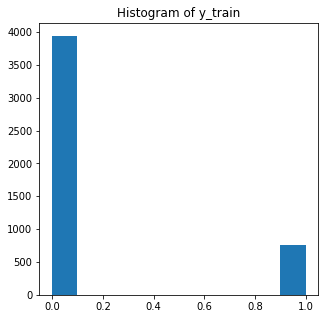

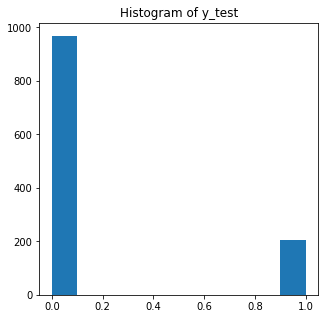

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.hist(y_train)
plt.title('Histogram of y_train')

fig = plt.figure(figsize=(5,5))
plt.hist(y_test)
plt.title('Histogram of y_test')

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [ ]:
#To evaluate our model, we will predict the values for our testing and training set and analyze its performance.
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

print("TESTING DATASET RESULTS")
print(classification_report(y_test, y_pred), "\n")

print("TRAINING DATASET RESULTS:")
print(classification_report(y_train, y_pred_train))

TESTING DATASET RESULTS
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       968
           1       1.00      0.01      0.03       205

    accuracy                           0.83      1173
   macro avg       0.91      0.51      0.47      1173
weighted avg       0.86      0.83      0.75      1173
 

TRAINING DATASET RESULTS:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3941
           1       1.00      0.01      0.02       751

    accuracy                           0.84      4692
   macro avg       0.92      0.50      0.46      4692
weighted avg       0.87      0.84      0.77      4692



In [ ]:
#Confussion matrix for test data
print("Confussion matrix for test data")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

print("\n")
print("Confussion matrix for training data")
#Confussion matrix for training data
c_matrix = confusion_matrix(y_train, y_pred_train)
print(c_matrix)

Confussion matrix for test data
[[968   0]
 [202   3]]


Confussion matrix for training data
[[3941    0]
 [ 745    6]]


### **ANSWERS AND OBSERVATIONS:**
  * We can observe the following results in the print:
*   Precision : **0.83** for target '0' and **1.00** for target '1'
*   Recall : **1.0** for target '0' and **0.01** for target '1'
*   Accuracy = **0.83**

  * We have noticed that the algorithm is not classifying both classes similarly. We can notice that the recall for target '0' is 1 (that is, all rows with target '0' have been properly classified) but precision is 0.83 which means that some of the values classified as '0' where actually of class '1'.In fact, as we can see in the confusion matrix, 202 of the values classified as class '0' were of class '1'. For the target '1' we observe the opposite behavior. That is, we observe that the precision is 1.0 (every row classified as class '1' actually belonged to it) but recall was 0.01 which is really low. This tells us that a lot of class '1' rows (actually 202 of them) have been misclassified as class '2'. However we achieved good accuracy because there were way more rows of target '0' and therefore, if we classify good enough the target '0' we could still achieve a great accuracy.

  *Furthermore, we also checked the same behaviour in our training data. There were no substancial changes between the behaviour of our algorithm between training and testing data, the precision is a little higher which makes sense because it is performing on seen data (if we saw abrupt differences, we might be in a case with overfitting). However, even though it gave us a little better performance, the correct way to do it is to obtain the performance of our algorithm with unseen data, that is, with the test data. The main reason for it is that the parameters of the algorithm haven't been optimized for the unseen data. If we could get great performance with unseen data it would mean that our algorithm is able to generalize. That would not happen if we only measured its performance on training data.
  

### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [ ]:
tree_classifier = DecisionTreeClassifier() 
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_classifier.predict(X_test)
y_pred_train = tree_classifier.predict(X_train)

print("For testing data:")
print(classification_report(y_test, y_pred), '\n')

c_matrix = confusion_matrix(y_test, y_pred)
print('Confussion matrix: \n',c_matrix)


For testing data:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       968
           1       0.33      0.37      0.35       205

    accuracy                           0.76      1173
   macro avg       0.60      0.61      0.60      1173
weighted avg       0.77      0.76      0.77      1173
 

Confussion matrix: 
 [[817 151]
 [129  76]]


### **ANSWERS AND OBSERVATIONS:**
  * We can observe the following results in the print:
*   Precision : **0.86** for target '0' and **0.33** for target '1'
*   Recall : **0.84** for target '0' and **0.37** for target '1'
*   Accuracy = **0.76**
  * In general terms, the Decision Tree model has better recall and lower precision than our SVM model. Under this conditions, we can not affirm that one model is better than the other as they have different metrics and we can't choose one over the other. Depending on the problem we would like to solve, we would chose one or another. If we seek for a high recall, we would choose the Decision Tree model but if we needed a higher precision we would choose SVM.

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX10**] [**CODE**] Train a SVM and Decision Tree algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

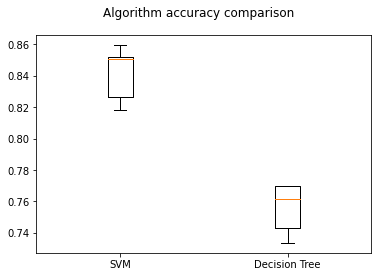

In [ ]:
kf = KFold(n_splits=5)

accuracy_svm = cross_val_score(SVC(), X_train, y_train, cv = kf, scoring = 'accuracy')
accuracy_tree = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = kf, scoring = 'accuracy')

results = [accuracy_svm, accuracy_tree]
names =['SVM', 'Decision Tree']

fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### Observations


*   We can clearly see that the average accuracy was quite higher in the SVM model with a value of 0.85 more-less while the average value of the accuracy for the Decision Tree classifier was around 0.76.

* Referring to the deviation of the accuracy, we note that it is way larger for the SVM than for the Decision Tree. Therefore the algorithm with less deviation on the accuracy is the latter.




## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX11**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


In [ ]:
print(len(customer_dt))
print(len(noncustomer_dt))

956
4909


In [ ]:
customer_dt.rename(columns = {'Customer_Flag':'Target'}, inplace = True)

Let's undersample the `noncustomer_dt` to balance both datasets:

In [ ]:
noncustomer_dt_sample=noncustomer_dt.sample(len(customer_dt))
noncustomer_dt_sample.rename(columns = {'Customer_Flag':'Target'}, inplace = True)
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 956


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

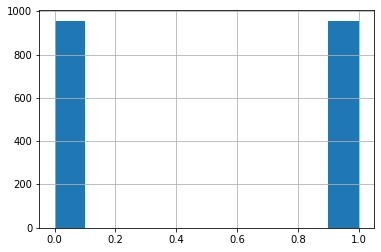

In [ ]:
final_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)

final_dataset=final_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
final_dataset.Target.hist()

### **ANSWERS AND OBSERVATIONS:**
At the beggining of the project we created two datasets exactly as demanded. At first, when we printed the length of them, we observed that there were 956 rows for customers and 4909 for noncustomers. Therefore, our dataset is clearly imbalanced. One of the options to balance both datasets would be undersampling the dataset having a higher length, which is noncustomer_dt. So, the first option would be to reduce the samples of non-customer dataset. Another option would be to incorporate new samples for the customer dataset (oversampling). We believe that the first options would be the easiest for this case.

[**EX12**][**CODE**][**REPORT**] Train a SVC and Decision Tree algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [ ]:
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.33, random_state=42) 

#SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("RESULTS FOR SVM")
print(classification_report(y_test, y_pred), "\n")
print("Confussion matrix")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
print("\n")


#TREE_CLASSIFIER
tree_classifier = DecisionTreeClassifier() 
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

print("RESULTS FOR TREE CLASSIFIER")
print(classification_report(y_test, y_pred), "\n")
print("Confussion matrix")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

RESULTS FOR SVM
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       319
           1       0.55      0.51      0.53       312

    accuracy                           0.55       631
   macro avg       0.55      0.55      0.55       631
weighted avg       0.55      0.55      0.55       631
 

Confussion matrix
[[190 129]
 [153 159]]


RESULTS FOR TREE CLASSIFIER
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       319
           1       0.56      0.58      0.57       312

    accuracy                           0.57       631
   macro avg       0.57      0.57      0.57       631
weighted avg       0.57      0.57      0.57       631
 

Confussion matrix
[[180 139]
 [132 180]]


### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX13**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [ ]:
svm = SVC()
tree = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[('SVM', svm), ('Decision Tree', tree)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

print(classification_report(y_test,y_pred))
print("Confussion matrix")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

              precision    recall  f1-score   support

           0       0.55      0.79      0.65       319
           1       0.61      0.33      0.43       312

    accuracy                           0.57       631
   macro avg       0.58      0.56      0.54       631
weighted avg       0.58      0.57      0.54       631

Confussion matrix
[[253  66]
 [208 104]]


### Bagging ensemble: Random Forest

[**EX14**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test,y_pred))
print("Confussion matrix")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       319
           1       0.65      0.66      0.65       312

    accuracy                           0.65       631
   macro avg       0.65      0.65      0.65       631
weighted avg       0.65      0.65      0.65       631

Confussion matrix
[[208 111]
 [107 205]]


[**EX15**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1.

Text(0, 0.5, 'Number of samples')

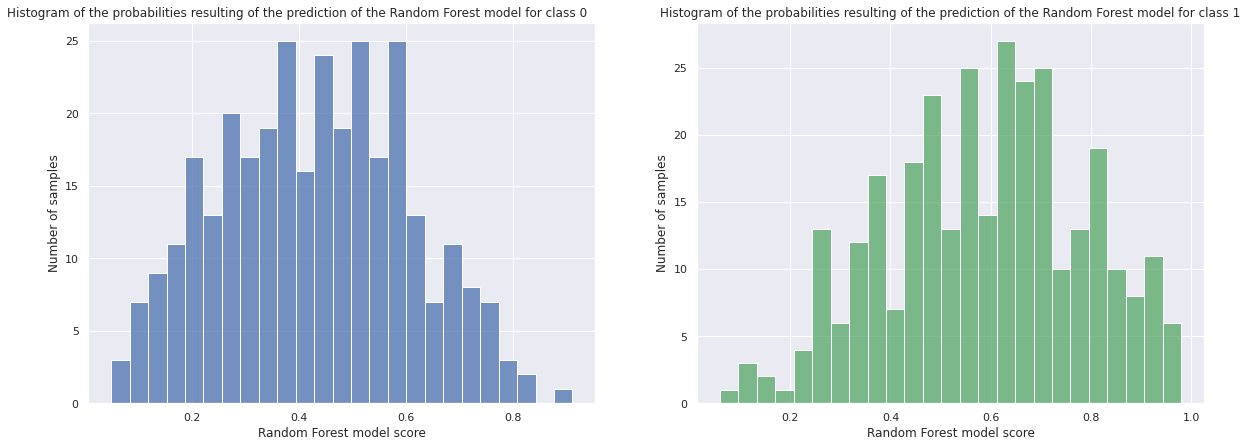

In [ ]:
#GETTING PROBABILITIES
y_pred_randomforest_prob = random_forest.predict_proba(X_test)
y_pred_randomforest_total = np.concatenate((y_pred_randomforest_prob[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)),axis=1)

#PLOTTING
sns.set(rc={'figure.figsize':(20,7)})

plt.subplot(121)
y_test_rf_0=y_pred_randomforest_total[y_pred_randomforest_total[:,1]==0]
sns.histplot(y_test_rf_0[:,0], color="b", bins = 25)
plt.title('Histogram of the probabilities resulting of the prediction of the Random Forest model for class 0                       ')
plt.xlabel('Random Forest model score')
plt.ylabel('Number of samples')

plt.subplot(122)
y_test_rf_1=y_pred_randomforest_total[y_pred_randomforest_total[:,1]==1]
sns.histplot(y_test_rf_1[:,0], color="g",bins=25)
plt.title('Histogram of the probabilities resulting of the prediction of the Random Forest model for class 1')
plt.xlabel('Random Forest model score')
plt.ylabel('Number of samples')

### Boosting ensemble: Gradient Tree Boosting

[**EX16**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)

print(classification_report(y_test,y_pred))
print("Confussion matrix")
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       319
           1       0.64      0.71      0.67       312

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631

Confussion matrix
[[195 124]
 [ 92 220]]


[**EX17**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Random Forest. Which one classifies better from your point of view? Why? 

Text(0, 0.5, 'Number of samples')

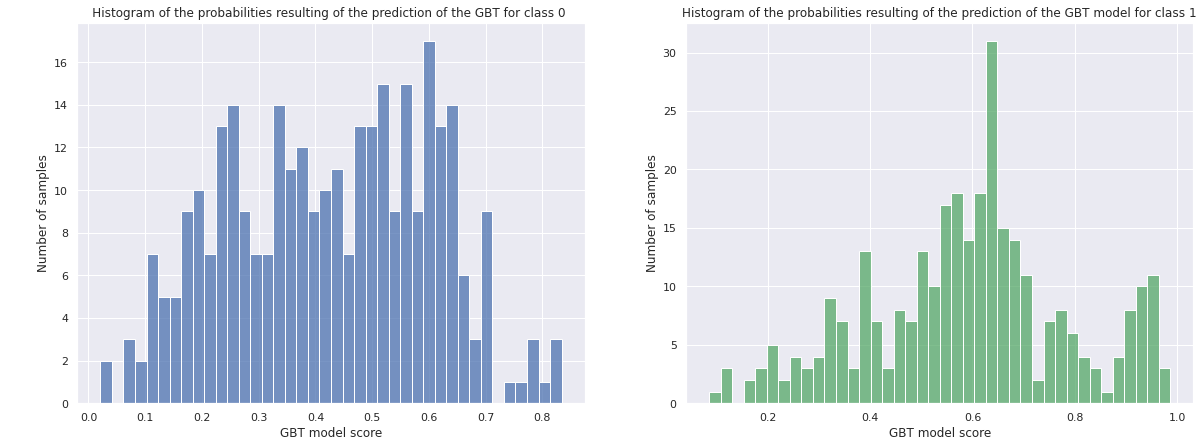

In [ ]:
#GETTING PROBABILITIES
y_pred_gradientboost_prob = gradient_boosting.predict_proba(X_test)
y_pred_gradientboost_total = np.concatenate((y_pred_gradientboost_prob[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)),axis=1)


#PLOTTING
sns.set(rc={'figure.figsize':(20,7)})

plt.subplot(121)
y_test_gtb_0=y_pred_gradientboost_total[y_pred_gradientboost_total[:,1]==0]
sns.histplot(y_test_gtb_0[:,0], color="b", bins =40)
plt.title('                      Histogram of the probabilities resulting of the prediction of the GBT for class 0                       ')
plt.xlabel('GBT model score')
plt.ylabel('Number of samples')

plt.subplot(122)
y_test_gtb_1=y_pred_gradientboost_total[y_pred_gradientboost_total[:,1]==1]
sns.histplot(y_test_gtb_1[:,0], color="g", bins=40)
plt.title('Histogram of the probabilities resulting of the prediction of the GBT model for class 1')
plt.xlabel('GBT model score')
plt.ylabel('Number of samples')


# 3. Creating a Business opportunity with Machine Learning

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX18**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?




In [ ]:
#Here we calculate the recall precision and accuracy of the model depending on which cut-off we choose:

y_pred_gradient = gradient_boosting.predict_proba(X_test)
cutoffs = [0.5, 0.55, 0.6, 0.65, 0.7,0.8]

y_pred_gtb_total = np.concatenate((y_pred_gradient[:,1].reshape(-1,1),np.asarray(y_test).reshape(-1,1)),axis=1)

for cutoff in cutoffs:
  y_pred_gradient = gradient_boosting.predict_proba(X_test)
  y_pred_change = []

  for i in range (len(y_pred_gtb_total)):
    
    if y_pred_gradient[i,1]>= cutoff:
      y_pred_change.append(1) #We classify as customrr
    else:
      y_pred_change.append(0) #We classify as noncustomer
  print('---------------------------------')
  print('\nGTB with cutoff: ', cutoff)
  print(classification_report(y_test,y_pred_change))
  print('\nConfusion matrix is: \n\n', confusion_matrix(y_test,y_pred_change))

---------------------------------

GTB with cutoff:  0.5
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       319
           1       0.64      0.71      0.67       312

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631


Confusion matrix is: 

 [[195 124]
 [ 92 220]]
---------------------------------

GTB with cutoff:  0.55
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       319
           1       0.67      0.62      0.65       312

    accuracy                           0.66       631
   macro avg       0.66      0.66      0.66       631
weighted avg       0.66      0.66      0.66       631


Confusion matrix is: 

 [[224  95]
 [118 194]]
---------------------------------

GTB with cutoff:  0.6
              precision    recall  f1-score   support

           0       0.62

Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [ ]:
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=gradient_boosting.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])

[**EX19**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [ ]:
features_importance.sort(key=lambda y: y[1], reverse=True) #Sorts from max to min with respect to the second value of the elements in the array (its importance)

#print(features_importance)

for i in range (len(features)):
    print('Top:',i,', feature importance: ', features_importance[i])

Top: 0 , feature importance:  ['Mobile_potential', 0.2300893370343828]
Top: 1 , feature importance:  ['Revenue', 0.1377348004767908]
Top: 2 , feature importance:  ['Legal_Form_Code', 0.12131466068247054]
Top: 3 , feature importance:  ['City_coded', 0.10116684592632531]
Top: 4 , feature importance:  ['CNT_CB_MOB_DENSITY', 0.09900009961604543]
Top: 5 , feature importance:  ['CNT_EMPLOYEE', 0.08954660700197538]
Top: 6 , feature importance:  ['CNT_CB_DENSITY', 0.08917759815542649]
Top: 7 , feature importance:  ['CNT_CB_FN_DENS', 0.07996483240509482]
Top: 8 , feature importance:  ['Sector', 0.05200521870148843]


  [**EX20**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of a **New IoT tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today this New IoT tariff is very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`Number of IoT devices (units)` vs `Number of IoT applications (units)`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `Number of IoT devices (units)` and `Number of IoT applications (units)` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- Is the training dataset balanced? Justiy your answer
- According to the previous plane, which are the customers to be phoned to sell the New IoT tariff?
- Could you estimate the **precision** and **recall** of the classification?


*******

**We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**